In [1]:
import csv
import numpy as np
import math

In [4]:
data_file = "cuprates_regression.DAT"

In [5]:
# Function to read and parse the .dat file
def parse_dat_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            # Assuming four columns in the .dat file
            if len(parts) == 2:
                # Convert data to appropriate types if needed
                name = parts[0]
                tc = float(parts[1])
                data.append([name, tc])
            else:
                print(f"Warning: Skipping line '{line}' as it does not have two columns.")

    return np.array(data)

In [6]:
generated_results_classification = parse_dat_file(data_file)

In [7]:
print(generated_results_classification)

[['O10.31Cu2.21Sr1.89Nb1.05Ru0.26Eu1.18' '63.0']
 ['O8.09Cu2.02Sr2.01Nb0.13Ru1.12Gd1.13' '74.9']
 ['O7.01Ca0.48Cu2.17Sr2.2Y0.47Bi1.72' '47.4']
 ...
 ['O8.65Cu2.05Sr2.29Nb0.39Ru0.7Sm1.49' '75.1']
 ['O10.23Cu2.51Sr2.22Nb0.93Eu1.18' '80.9']
 ['H0.14O3.84Cu0.91La2.01' '54.3']]


In [10]:
generated_results_classification[0][1]

'63.0'

In [8]:
np.size(generated_results_classification, 0)

7080

In [11]:
tc_list = []
for i in range(np.size(generated_results_classification, 0)):
    tc_list.append(generated_results_classification[i][1])

In [12]:
print(tc_list)

['63.0', '74.9', '47.4', '55.6', '71.6', '79.0', '58.1', '84.8', '63.6', '70.9', '49.7', '78.1', '38.0', '75.5', '77.2', '65.8', '50.8', '54.6', '60.0', '57.7', '66.4', '53.5', '57.7', '71.3', '45.2', '63.9', '71.6', '65.6', '58.8', '68.9', '59.8', '58.3', '60.1', '70.8', '52.7', '65.2', '57.1', '85.8', '72.1', '63.7', '65.3', '34.6', '75.7', '60.8', '55.3', '43.9', '66.5', '57.7', '79.0', '79.0', '73.2', '82.1', '63.0', '98.9', '34.7', '86.0', '90.2', '44.6', '54.8', '56.3', '58.3', '62.7', '91.8', '88.2', '50.7', '99.5', '77.1', '61.7', '80.7', '59.0', '80.2', '73.3', '48.3', '62.9', '73.9', '70.8', '39.1', '51.2', '60.4', '84.6', '78.5', '71.7', '77.3', '75.6', '86.2', '54.8', '41.4', '69.6', '70.9', '63.0', '78.8', '41.7', '81.2', '40.0', '26.0', '57.7', '60.7', '68.7', '77.4', '59.4', '71.6', '72.7', '59.1', '65.9', '71.9', '63.4', '47.3', '57.9', '52.3', '58.3', '86.0', '74.4', '59.7', '68.1', '61.3', '74.9', '78.3', '83.4', '69.7', '76.5', '45.2', '69.7', '72.4', '62.4', '44.0',

In [5]:
print(f"Raw Percentage Superconducting: {100*(len(tc_list)/np.size(generated_results_classification, 0))}%")

Raw Percentage Superconducting: 81.52173913043478%


In [6]:
print(f"True Percentage Superconducting: {100*((len(tc_list)/np.size(generated_results_classification, 0))-0.1694) / (0.9869-0.1694)}%")

True Percentage Superconducting: 78.9990692727031%


In [13]:
print(f"Mean Tc (K): {sum(tc_list)/len(tc_list)}")

TypeError: unsupported operand type(s) for +: 'int' and 'numpy.str_'

In [20]:
tc_list = np.float64(np.array(tc_list))

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

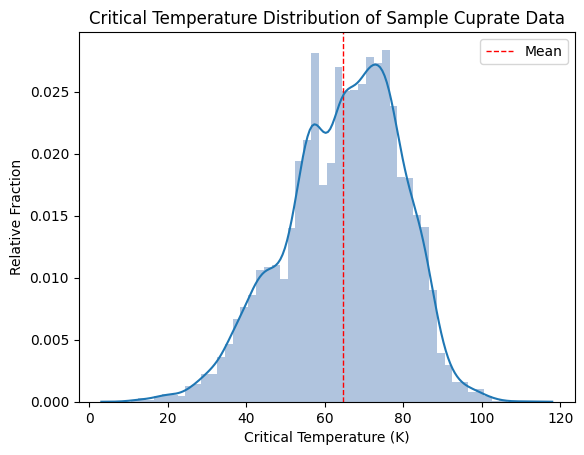

In [24]:
mu, std = norm.fit(tc_list)

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1)

plt.hist(tc_list, color = "lightsteelblue", density = True, bins = 50)

sns.kdeplot(data=tc_list)

plt.xlabel('Critical Temperature (K)')
plt.ylabel('Relative Fraction')
plt.legend(["Mean"])

plt.title('Critical Temperature Distribution of Sample Cuprate Data')
plt.show()

In [25]:
print(std)

14.614471938389837


In [26]:
print(mu)

64.68096045197741


In [28]:
np.amax(tc_list)

110.5

In [29]:
print(f"Raw Percentage Superconducting: {100*(np.size(tc_list)/10971)}%")

Raw Percentage Superconducting: 64.53377085042385%


In [32]:
print(f"True Percentage Superconducting: {100*(((np.size(tc_list)/10971)-0.1694) / (0.9869-0.1694))}%")

True Percentage Superconducting: 58.21867993935639%
